In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate

In [ ]:
bs = 64

In [4]:
!pip install PyDrive

     |████████████████████████████████| 993kB 2.7MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [ ]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:

auth.authenticate_user()
gauth=GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = '1sL4I4xNh8AeAlPnhrIOOwbr6TX58ahyC'

In [13]:
downloaded = drive.CreateFile({'id':link}) 
downloaded.GetContentFile('dataset.tar')
import tarfile
tar = tarfile.open("dataset.tar")
path = tar.extractall('DS/')
tar.close()
path = Path.cwd().joinpath("DS/dataset/")
path.ls()
#path = untar_data('https://drive.google.com/open?id=1SChipSdLmkoUkGMMZLLJv8Qwl3vi84eT')

[PosixPath('/content/DS/dataset/train'),
 PosixPath('/content/DS/dataset/valid')]

In [ ]:
path_benign = path/'benign'
path_malware = path/'malware'
#fnames = get_image_files(path_malware)
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=224)

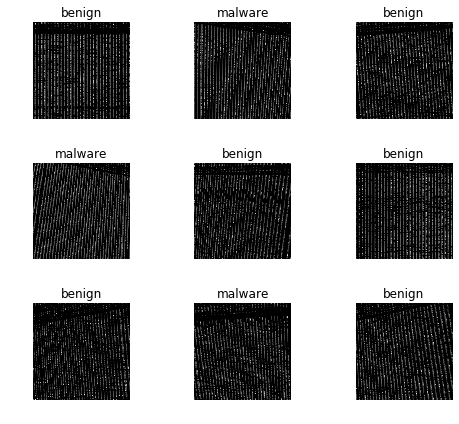

In [16]:
data.show_batch(rows=3, figsize=(7,6))

In [17]:
print(data.c)
print(data.classes)

2
['benign', 'malware']


In [18]:
learn = create_cnn(data, models.resnet34, metrics = error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 101447319.67it/s]


In [19]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [24]:
pred = []
actual = []
learn = {}

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.504945,0.350076,0.120370
2,0.354982,0.203374,0.055556
3,0.284261,0.166511,0.064815
4,0.252188,0.182007,0.074074


In [ ]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate
1,0.247028,0.164738,0.074074
2,0.240637,0.145080,0.055556
3,0.230075,0.132620,0.037037
4,0.201723,0.133829,0.046296
5,0.185029,0.138250,0.046296
6,0.177677,0.127838,0.027778
7,0.165610,0.107848,0.027778
8,0.157411,0.107452,0.027778
9,0.161835,0.107474,0.037037
10,0.146908,0.102322,0.027778


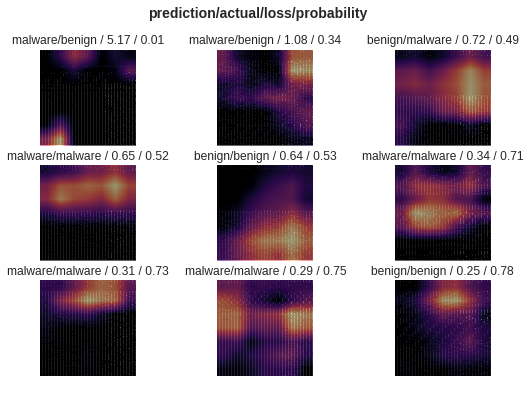

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs =  interp.top_losses()
interp.plot_top_losses(9,figsize=(9,6))

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate
1,0.035564,0.132833,0.027778
2,0.051059,0.144039,0.037037
3,0.078177,0.137090,0.027778
4,0.080909,0.223099,0.074074
5,0.062967,0.086862,0.027778
6,0.062963,0.071190,0.009259
7,0.045722,0.084111,0.009259
8,0.042528,0.095167,0.009259
9,0.027544,0.090435,0.009259
10,0.028034,0.084429,0.009259


In [ ]:
learn.save('stage-1-malware-detection')

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 9.12E-07


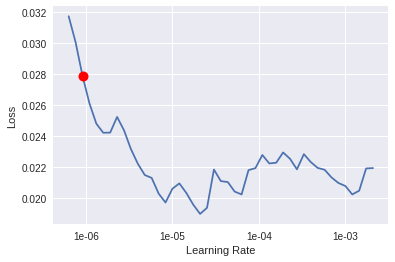

In [ ]:
learn.recorder.plot()

In [20]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.733707,0.354799,0.120370,01:04
1,0.472976,0.237306,0.074074,01:01
2,0.339374,0.232830,0.083333,01:01
3,0.302123,0.216470,0.064815,01:01
4,0.274884,0.211544,0.064815,01:01


In [27]:
import metric_conf

cm = metric_conf.confusion_matrix(learn, pred, actual)
print(cm[0][0], cm[0][1])
print(cm[1][0], cm[1][1])
metric_conf.accuracy_score(pred, actual)

1040 70
80 150


0.9153846153846154